# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import pprint 
from datetime import datetime

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 596


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [6]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?" 

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    units = "metric"
    city_url = url + "appid=" + weather_api_key + "&q=" + city + "&units=" + units
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | adamstown
Processing Record 2 of Set 1 | blackmans bay
Processing Record 3 of Set 1 | grytviken
Processing Record 4 of Set 1 | isafjordur
Processing Record 5 of Set 1 | puerto deseado
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | west island
Processing Record 8 of Set 1 | bonnyville
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | ryotsu-minato
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | ribeira grande
Processing Record 13 of Set 1 | kouroussa
Processing Record 14 of Set 1 | bahia honda
Processing Record 15 of Set 1 | anabar
City not found. Skipping...
Processing Record 16 of Set 1 | as sulayyil
Processing Record 17 of Set 1 | thompson
Processing Record 18 of Set 1 | puerto san carlos
City not found. Skipping...
Processing Record 19 of Set 1 | papatowai
Processing Record 20 of Set 1 | lihue
Processing Record 21 

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          570
Lat           570
Lng           570
Max Temp      570
Humidity      570
Cloudiness    570
Wind Speed    570
Country       570
Date          570
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,adamstown,-25.0660,-130.1015,21.91,79,90,4.52,PN,1715128875
1,blackmans bay,-43.0167,147.3167,11.52,93,100,3.71,AU,1715128876
2,grytviken,-54.2811,-36.5092,-1.99,78,23,3.89,GS,1715128876
3,isafjordur,66.0755,-23.1240,0.61,99,100,2.00,IS,1715128876
4,puerto deseado,-47.7503,-65.8938,4.24,92,100,6.02,AR,1715128876


In [9]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [10]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.91,79,90,4.52,PN,1715128875
1,blackmans bay,-43.0167,147.3167,11.52,93,100,3.71,AU,1715128876
2,grytviken,-54.2811,-36.5092,-1.99,78,23,3.89,GS,1715128876
3,isafjordur,66.0755,-23.1240,0.61,99,100,2.00,IS,1715128876
4,puerto deseado,-47.7503,-65.8938,4.24,92,100,6.02,AR,1715128876


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

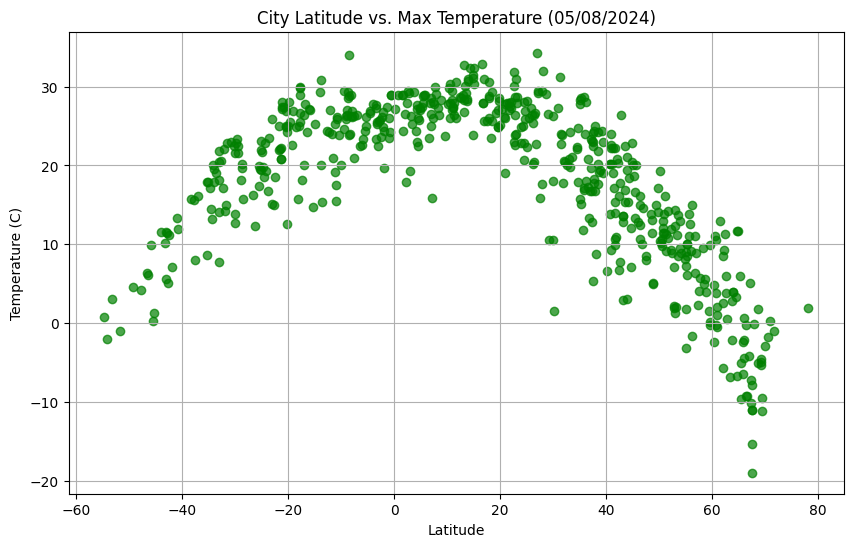

In [14]:
# Build scatter plot for latitude vs. temperature
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], color='green', alpha=0.7)

# Convert the date from Unix timestamp to a datetime object
date_obj = datetime.utcfromtimestamp(city_date)

# Format the date in MM/DD/YYYY format
formatted_date = date_obj.strftime("%m/%d/%Y")

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Temperature (C)")
plt.title(f"City Latitude vs. Max Temperature ({formatted_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

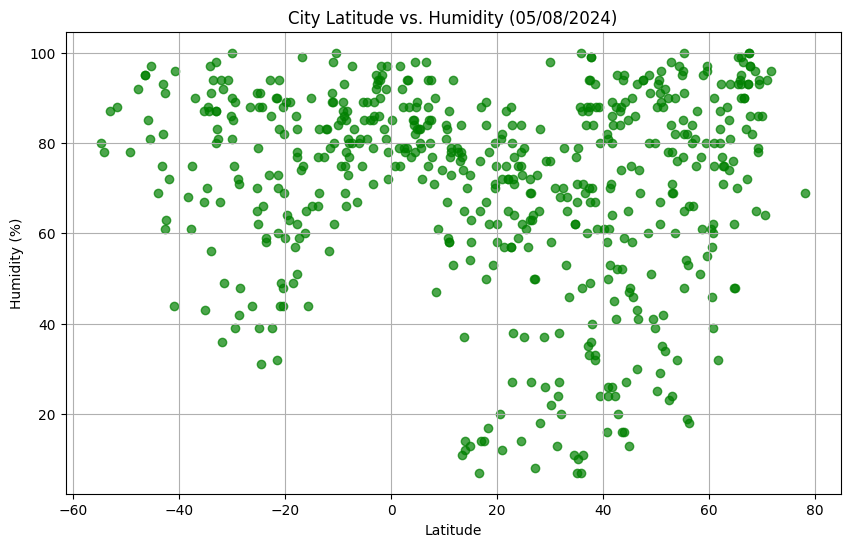

In [15]:
# Build the scatter plots for latitude vs. humidity
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], color='green', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity ({formatted_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

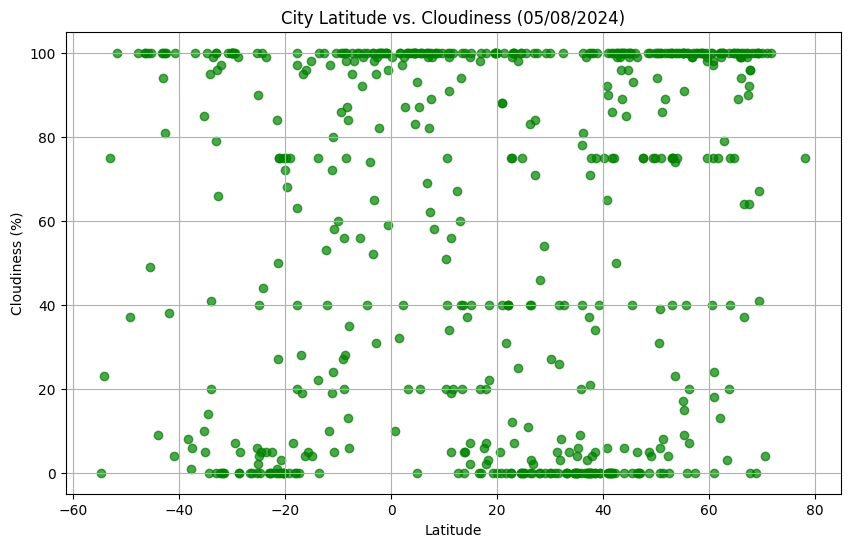

In [16]:
# Build the scatter plots for latitude vs. cloudiness
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], color='green', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness ({formatted_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

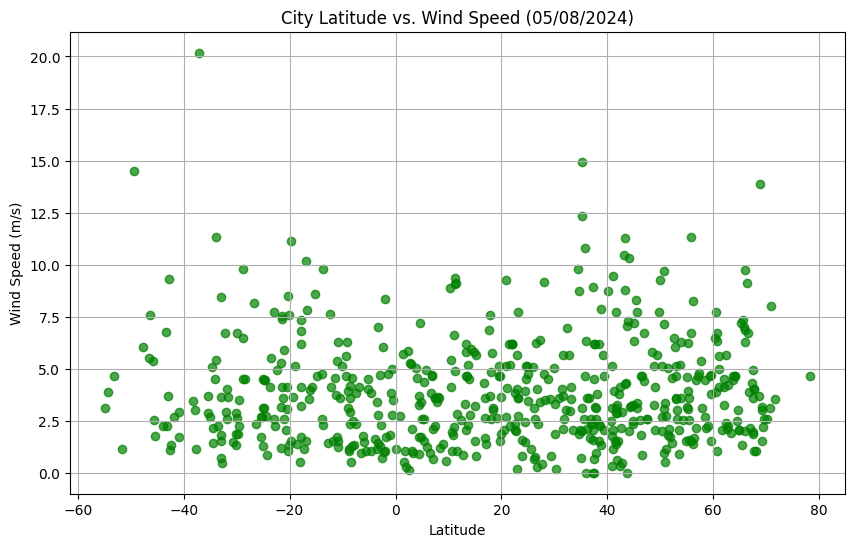

In [17]:
# Build the scatter plots for latitude vs. wind speed
plt.figure(figsize=(10, 6))
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], color='green', alpha=0.7)

# Incorporate the other graph properties
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.title(f"City Latitude vs. Wind Speed ({formatted_date})")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [18]:
# Define a function to create Linear Regression plots
def plot_lin_reg(x_values, y_values, titles, text_coordinates, title="Linear Regression Plot"):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regression = x_values * slope + intercept
    
    line_eq = "y =" + str(round(slope,2)) + "x +" + str(round(intercept,2))
    
    plt.scatter(x_values, y_values)
    plt.plot(x_values, regression, color='red')
    plt.annotate(line_eq, text_coordinates, fontsize=16, color="red")
    plt.grid(True)
    plt.xlabel("Latitude")
    plt.ylabel(titles)
    plt.title(title)
    print(f"The r-value is: {rvalue}")
    plt.show()

In [19]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat']>0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,isafjordur,66.0755,-23.1240,0.61,99,100,2.00,IS,1715128876
7,bonnyville,54.2668,-110.7350,8.89,97,100,2.55,CA,1715128877
8,georgetown,5.4112,100.3354,27.96,83,20,1.54,MY,1715128647
9,ryotsu-minato,38.0833,138.4333,8.82,84,100,3.77,JP,1715128877
11,ribeira grande,38.5167,-28.7000,17.65,93,34,2.24,PT,1715128878


In [20]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,adamstown,-25.0660,-130.1015,21.91,79,90,4.52,PN,1715128875
1,blackmans bay,-43.0167,147.3167,11.52,93,100,3.71,AU,1715128876
2,grytviken,-54.2811,-36.5092,-1.99,78,23,3.89,GS,1715128876
4,puerto deseado,-47.7503,-65.8938,4.24,92,100,6.02,AR,1715128876
5,avarua,-21.2078,-159.7750,28.03,94,75,3.60,CK,1715128876


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8631542196042457


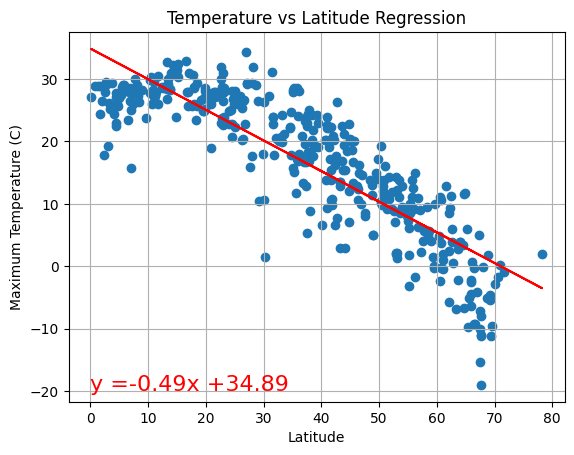

In [24]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Max Temp"]

plot_lin_reg(x_values, y_values, "Maximum Temperature (C)", (0, -20), "Temperature vs Latitude Regression")


The r-value is: 0.8001574112209972


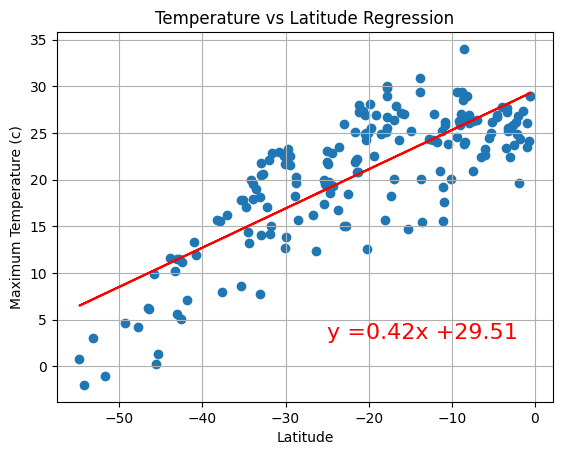

In [25]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Max Temp"]

plot_lin_reg(x_values, y_values, "Maximum Temperature (c)", (-25, 3), "Temperature vs Latitude Regression")

**Discussion about the linear relationship:** In both hemispheres, there is a strong correlation between latitude and maximum temperature. In each case, the closer to the equator the latitude of the location is, the higher the maximum temperature recorded. 

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.08556876325801843


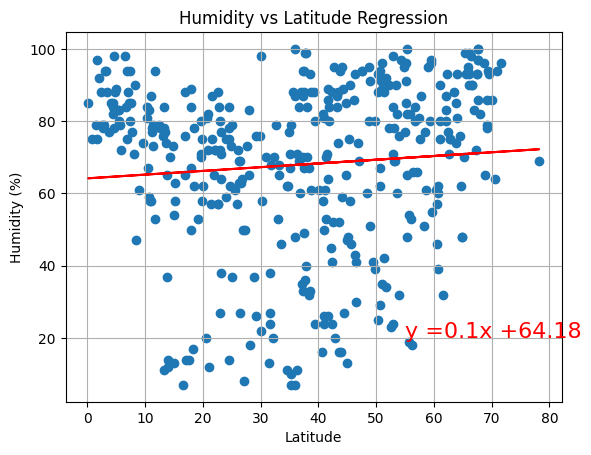

In [26]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Humidity"]

plot_lin_reg(x_values, y_values, "Humidity (%)", (55, 20), "Humidity vs Latitude Regression")

The r-value is: 0.10126272428019055


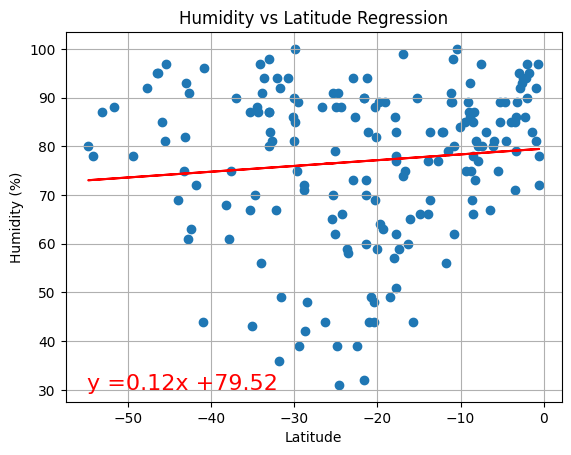

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Humidity"]

plot_lin_reg(x_values, y_values, "Humidity (%)", (-55, 30), "Humidity vs Latitude Regression")

**Discussion about the linear relationship:** There does not appear to be any correlation between the latitude of a location and the humidity experienced in that location, for either hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.10777936166587532


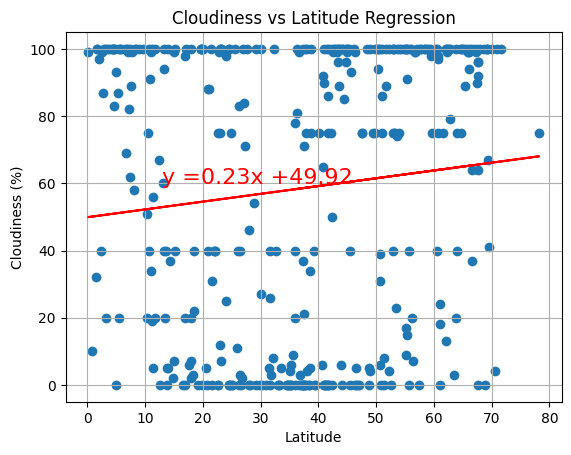

In [30]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Cloudiness"]

plot_lin_reg(x_values, y_values, "Cloudiness (%)", (13, 60), "Cloudiness vs Latitude Regression")

The r-value is: 0.1442050761476078


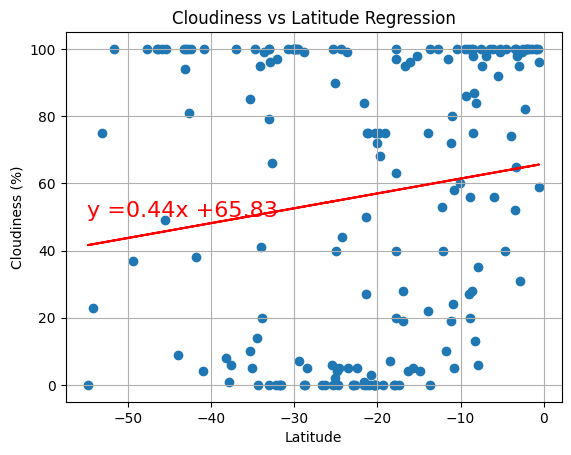

In [31]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Cloudiness"]

plot_lin_reg(x_values, y_values, "Cloudiness (%)", (-55, 50), "Cloudiness vs Latitude Regression")

**Discussion about the linear relationship:** There does not appear to be any correlation between the latitude of a location and the frequency of a cloudy day experienced in that location, for either hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.10375916942070794


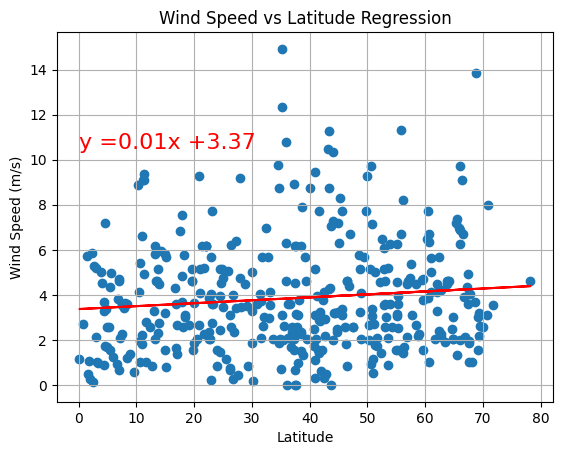

In [32]:
# Northern Hemisphere
x_values = northern_hemi_df["Lat"]
y_values = northern_hemi_df["Wind Speed"]

plot_lin_reg(x_values, y_values, "Wind Speed (m/s)", (0, 10.5), "Wind Speed vs Latitude Regression")

The r-value is: -0.14350388919320636


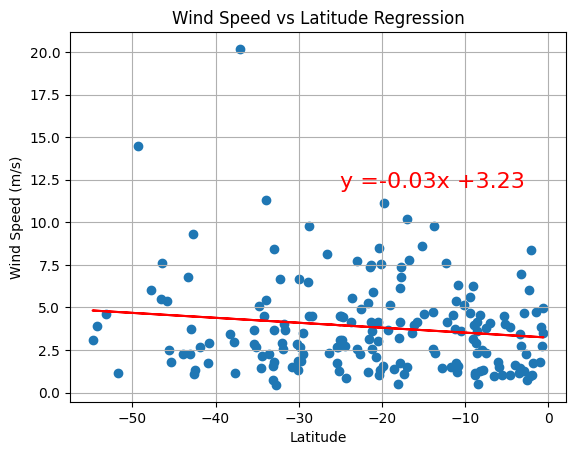

In [33]:
# Southern Hemisphere
x_values = southern_hemi_df["Lat"]
y_values = southern_hemi_df["Wind Speed"]

plot_lin_reg(x_values, y_values, "Wind Speed (m/s)", (-25, 12), "Wind Speed vs Latitude Regression")

**Discussion about the linear relationship:** There does not appear to be any correlation between the latitude of a location and the wind speed experienced in that location, for either hemisphere.